# STAT40800 Data Programming with Python
## Dr. Áine Byrne


# Week 10

This week we cover machine learning in Python. We'll use the scikit-learn library, which is a fantastically complete, easy to use and well-documented package. First we'll cover the basics of machine learning, including supervised vs unsupervised learning, and classiffcation vs regression. Then we'll go through some of the most common methods
including lasso, support vector machines and random forests. We'll finish off with some extras including creating ROC curves

This lecture is essentially a summary of the most useful bits
from scikit-learn.org. The [examples page](scikit-learn.org/stable/auto_examples) is particularly worth reading.


In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import numpy.random as npr
import matplotlib.pyplot as plt

# What is machine learning?

A machine learning (ML) algorithm uses experience or data to make predictions about future events or observations. ML problems involve observations (dependent variable) and features (explanatory variables). The algorithm searches for relationships between the features and observations, such that future observations can be predicted.

The two most common approaches to machine learning are *supervised learning* and *unsupervised learning*. Another more recent approach is *reinforcement learning*.

In supervised learning we also have a response variable *y* of
length *n*. We want to be able to predict *y* from the features *X*. The relationship between the *X* and *y* may be non-linear and involve complicated interactions.
Unlike the regression algorithms considered last week, we are typically only interested in which features (i.e. the columns) of *X* are important in predicting *y* and don't usually care too
much about the structure of the relationship. As such, we're happy
to use *black box methods*.

We will cover unsupervised learning and reinforcement learning next week.


## Regression versus classification
If *y* is a quantitative variable we are essentially performing *regression*. Whereas. if *y* is a categorical variable we are performing classification.
We will only cover the case of classification where *y* is binary.

## Training and test sets
A very common approach in ML is to split the data (i.e. both *X* and *y*) up into training and test sets. The training set is used to fit the model whilst the test set is used to evaluate performance and possible compare between different approaches. It is common to use 75% of the data for training purposes and the remaining 25% for the test data.

# Machine learning in Python
The scikit-learn (often shortened to sklearn) package is a very
comprehensive set of ML tools for fitting and evaluating
prediction methods

All of the methods are fitted in roughly the same manner, making it very easy to learn and hence compare the performance of different methods.


## sklearn datasets
As sklearn is a rather large package, we will install individual modules as we go. The first of which is `datasets` which contains a number of sample datasets for ML.

In [2]:
from sklearn import datasets

For the first part of this lecture we will use the diabetes data set from Efron et al (2004) "Least Angle Regression", Annals of Statistics, 407-499. It contains 10 features and 442 observations, plus a response variable which measures disease progression.

In [3]:
diabetes = datasets.load_diabetes()

The sklearn datasets all come with a `.target` (the response
variable) and a `.data` (feature matrix) attribute, which are NumPy arrays. The column headings for the features are also included, and can be accessed using `.feature_names`.

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

We will need to convert the feature matrix and response vector into a DataFrame and Series, respectively. We will then standardise our feature matrix.

In [5]:
X_raw = DataFrame(diabetes.data,columns=diabetes.feature_names)
X_std = (X_raw - X_raw.mean())/X_raw.std()
y = Series(diabetes.target)

To make things more interesting we will append 100 noise variables onto *X*. These should not come out as important variables in determining *y*.

In [11]:
np.random.seed(123)
X = X_std.join(DataFrame(np.random.randn(len(y), 100)))

#### Exercise 1
Load in the Boston house prices dataset from sklearn (`load_boston`). Convert the feature matrix and response vector into pandas objects, as was done for the diabetes dataset. Then standardise the feature matrix.

In [9]:
boston = datasets.load_boston()
B_raw = DataFrame(boston.data,columns = boston.feature_names)
B_std = (B_raw - B_raw.mean())/B_raw.std()
yB = Series(boston.target)
#B_std.head()
yB.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

## Training and test sets
We have 442 observations so will split the data into training and test sets of size 332 and 110 respectively. Importantly, the data for each set must be selected randomly and each observation must only appear in one of the sets.


In [12]:
train_size = 332
np.random.seed(123)
train_select = np.random.permutation(range(len(y)))
X_train = X.iloc[train_select[:train_size],:].reset_index(drop=True)
X_test = X.iloc[train_select[train_size:],:].reset_index(drop=True)
y_train = y[train_select[:train_size]].reset_index(drop=True)
y_test = y[train_select[train_size:]].reset_index(drop=True)

**Note:** `reset_index` drops the original row index and resets it, such that the first row has index 0, second has index 1, and so on. 

#### Exercise 2
Split the Boston house price data into training and test sets, of size 380 and 126, respectively. Use 99 as the random seed value for your permutation. Is the mean house price roughly the same in both training and test sets?

# Regression

## Linear regression

We'll start by performing standard linear regression on the data, which requires the `linear_model` module of sklearn

In [13]:
from sklearn import linear_model

This module contains lots of different regression methods. We will use the `LinearRegression` function to perform a linear regression. We then apply the `fit` method to our model using the training data.

In [14]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

Once fitted, we can look at the regression coefficients. These are the $\beta$ values we computed last week.

In [15]:
reg.coef_

array([ 6.94101162e-01, -1.45485310e+01,  2.20912506e+01,  1.59949206e+01,
       -5.16815212e+01,  3.26997569e+01,  1.12646067e+01,  1.15771276e+01,
        4.66156877e+01,  6.40589549e-01,  5.69844337e+00, -5.20345814e+00,
        4.35039738e+00, -7.41160700e+00,  3.83913026e+00, -1.46034820e+00,
        3.83423651e+00,  2.32904424e+00, -3.58770210e+00,  4.14236350e+00,
       -2.80480423e+00, -1.42578103e+00,  5.00013541e+00,  6.49457407e-02,
        2.75110751e+00,  2.12519253e+00, -2.71520532e+00,  3.37148717e+00,
        1.18387356e+00,  8.92822466e-01,  5.35637573e+00,  2.63716409e+00,
       -5.47520670e+00,  3.39824612e+00,  1.81672801e+00,  1.69346937e+00,
       -7.66282467e+00,  1.34215721e+00,  2.59334407e+00,  5.16084146e+00,
        1.87613337e+00, -3.80979019e+00, -4.33015305e+00,  4.10268824e-01,
        1.87688939e+00,  4.71378884e-01, -1.47945802e+00, -1.17669112e+00,
        4.79993609e+00,  1.64017361e+00, -7.88291802e-01, -2.79983556e+00,
       -5.52671987e-01, -

We can also use the model to predict the response variable for unseen data, such as the test data.

In [16]:
reg_test_pred = reg.predict(X_test)

A sensible way to assess the model's performance is to plot the actual values of y versus the predictions.



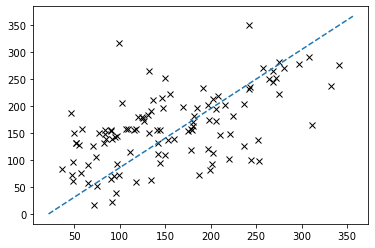

In [17]:
fig = plt.figure()
plt.plot(y_test,reg_test_pred,'kx')
plt.plot(plt.xlim(), plt.ylim(), ls="--")

The mean square error (MSE) will also tell us how well the model performs. The MSE is a measure of the discrepancy between the data and an estimation model, where a small value indicates a tight fit.

In [18]:
MSE_reg = np.mean(pow((reg_test_pred - y_test),2))
print(MSE_reg)

4274.381477876535


#### Exercise 3
Fit a linear regression model to the training data for the Boston house price dataset. Use the model to predict the house prices for the test set and compare the results to the true house prices. What is the mean square error?

## Lasso method

In standard least squares linear regression we try to solve the
following optimisation problem:

$$\text{Find the }\hat{\beta}\text{ that minimises}\sum_{i=1}^n\left(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j\right)^2$$

where $n$ is the number of observations and $p$ is the number of features/independent variables.

This can also be written as:
$$\hat{\beta}=\underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j\right)^2$$

In lasso regression the poblem changes to:
$$\hat{\beta}_{lasso}=\underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j\right)^2\text{ subject to }\sum_{j=1}^p |\beta_j|<t$$

As with forward selection AIC regression, lasso tries to minimise the number of variables included in the model.

A useful way to re-write the lasso equation is:
$$\hat{\beta}_{lasso}=\underset{\beta}{\text{argmin}}\left[\sum_{i=1}^n\left(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j\right)^2+\lambda\sum_{j=1}^p |\beta_j|\right]$$
where the parameter $\lambda$ controls the degree of shrinkage of the $\beta$s.
If $\lambda$ is very large many of the $\beta$s will be set to 0 and the number of variable included in the model will be small.

The parameter $\lambda$ can be chosen by cross-validation; sklearn has a function `LassoCV` for this. The argument `cv` specifies the number of folds in our cross-validation.


In [14]:
lasso = linear_model.LassoCV(cv=10)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 0.         -4.78739249 22.50182784  6.58741175 -0.         -0.
 -5.55239479  0.         27.29867121  0.          0.         -0.
  0.         -0.          0.         -0.          0.          0.
 -0.          0.         -0.         -0.          0.         -0.
  0.25163084 -0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.          0.          0.
 -0.          0.          0.          0.          0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
  0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.7032212  -0.
  0.          0.         

In [15]:
linear_model.LassoCV?

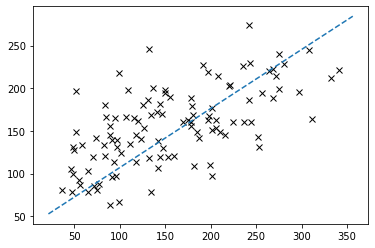

In [16]:
lasso_test_pred = lasso.predict(X_test)
fig = plt.figure()
plt.plot(y_test,lasso_test_pred,'kx')
plt.plot(plt.xlim(), plt.ylim(), ls="--")

In [17]:
MSE_lasso = np.mean(pow((lasso_test_pred- y_test),2))
print(MSE_lasso)

3371.885042464712


Fitting methods for the lasso are very fast; it can handle
hundreds of thousands of features with ease.

**Note:** lasso is still a linear model, and it does not
include any interactions between variables unless specifically
included in the X matrix.

## Support vector regression

Support vector machines (SVMs; here called support vector regression SVR) are usually used for classification (studied later) but can also be used for regression.

The method is somewhat similar to the lasso but uses a different loss function, where only those points which contribute a large amount to the mean square error are used in the prediction; these are the so-called support vectors.
With some clever kernel tricks, the method can project into
higher dimensions to find the optimal regression planes.

SVR is somewhat of a black box method, the underlying algorithm is not easily understood.

The module for SVR is `svm` and we will use the `SVR` function from that module. The syntax is similar to the previously considered methods.

In [19]:
from sklearn import svm
my_svm = svm.SVR(gamma='scale')
my_svm.fit(X_train, y_train)
svm_test_pred = my_svm.predict(X_test)
MSE_svm = np.mean(pow((svm_test_pred- y_test),2))
print(MSE_svm)

5671.444718730306


In [20]:
svm.SVR?

## Random forest regression

Random forest regression works by creating lots of different decision trees based on subsets of the dataset. 
Each decision tree involves a series of simple yes/no questions.
The trees are then combined so that the resulting
prediction is an average of the predictions from each of the
trees.

Each individual tree is a weak learner, but when used
together the trees can predict a very wide variety of non-linear
behaviour with complex interactions; a phenomenon known as
*boosting*
Because each tree is built on a subset of the data, it is very
fast and easy to parellelise


<img src="https://i0.wp.com/dataaspirant.com/wp-content/uploads/2017/04/Random-Forest-Introduction.jpg?w=800&ssl=1" width=800 />

Taken from https://dataaspirant.com/random-forest-algorithm-machine-learing/

For random forest regression, we load in the `RandomForestRegressor` function from the `ensemble` module of sklearn. The model is fit in a similar fashion to the previous models.

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_test_pred = rf.predict(X_test)
MSE_rf = np.mean(pow((rf_test_pred- y_test),2))
print(MSE_rf)

3593.2612690909086


In [21]:
RandomForestRegressor?

Other supervised learning techniques include:
* *k* nearest neighbours
* Gaussian processes
* Other versions of lasso
* Neural networks
* Smoothing splines

#### Exercise 4

An simpler alternative to random forests is Decision Tree Regression (sometimes found under the name Classification And Regression Trees; CART). For examples, see

http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#example-tree-plot-tree-regression-py

Using the standardise Boston house price data, fit a decision tree model with `max_depth=10` and `max_depth=5` and a random forest model with `max_depth=10` and `max_depth=5` (keeping the number of trees fixed at 10). The model should be fit to the training data and predictions should be made using the test data.

Which model gives the lowest mean square error?

**Note:** Include the extra argument `random_state=246` or specify the seed before each model fit

# Classification

In this section we will re-analyse the South African heart disease dataset from last week.

In [22]:
SA = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data')
X_raw = SA.drop(['row.names','famhist','chd'],axis=1)
X_raw_std = (X_raw-X_raw.mean())/X_raw.std()
y = SA.chd
np.random.seed(123)
X = X_raw_std.join(DataFrame(np.random.randn(len(y), 100)))

Split into training and test sets

In [23]:
train_size = 347
np.random.seed(123)
train_select = np.random.permutation(range(len(y)))
X_train = X.iloc[train_select[:train_size],:].reset_index(drop=True)
X_test = X.iloc[train_select[train_size:],:].reset_index(drop=True)
y_train = y[train_select[:train_size]].reset_index(drop=True)
y_test = y[train_select[train_size:]].reset_index(drop=True)

## Logistic Regression
For logistic regresssion we use the `LogisticRegression` function from the `linear_model` module of sklearn. We will load in the function directly to save havign to write the module name every time.

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
logreg_test_pred = logreg.predict(X_test)

`crosstab` is a useful function that compues the number of true negatives, false negatives, false positives and true positives. This is also known as the confusion matrix.

In [25]:
logreg_cross = pd.crosstab(logreg_test_pred,y_test)
print(logreg_cross)

chd     0   1
row_0        
0      54  24
1      18  19


The misclassification rate is the percentage of incorrect results, i.e. (false positive + false negtaives)/number of data points

In [26]:
logreg_misclas = (logreg_cross.iloc[0,1]+logreg_cross.iloc[1,0])/np.sum(logreg_cross.values)*100
print(logreg_misclas)

36.52173913043478


`predict` predicts the category (0 or 1 in this case), while `predict_proba` will give the probability of the result being in each category.


In [27]:
print(logreg_test_pred[:10],'\n')
logreg_test_prob = logreg.predict_proba(X_test)
print(logreg_test_prob[:10])

[0 0 1 0 1 1 0 1 0 0] 

[[0.97932838 0.02067162]
 [0.57132964 0.42867036]
 [0.36590344 0.63409656]
 [0.97729985 0.02270015]
 [0.053005   0.946995  ]
 [0.05687871 0.94312129]
 [0.7305879  0.2694121 ]
 [0.27394274 0.72605726]
 [0.5792155  0.4207845 ]
 [0.84200993 0.15799007]]


In [28]:
print(logreg_test_pred[:10])

[0 0 1 0 1 1 0 1 0 0]


## Lasso logistic regression
There's no easy way to do cross-validation and so estimating the shrinkage parameter $\lambda$ needs to be performed manually. We choose an arbitrary penalty $C\sim 1/\lambda$.

In [29]:
lassologreg = LogisticRegression(solver='saga',penalty='l1',C=0.1)
lassologreg.fit(X_train, y_train) 
lassologreg_test_pred = lassologreg.predict(X_test)
lassologreg_cross = pd.crosstab(lassologreg_test_pred,y_test)
print(lassologreg_cross)

chd     0   1
row_0        
0      64  30
1       8  13


In [30]:
lassologreg_misclas = (lassologreg_cross.iloc[0,1]+lassologreg_cross.iloc[1,0])/np.sum(lassologreg_cross.values)*100
print(logreg_misclas)

36.52173913043478


## Random forest classification
For random forest classification we use the `RandomForestClassifier` from the `ensemble` module of sklearn.

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf_fit = rf_clf.fit(X_train, y_train)
rf_clf_test_pred = rf_clf_fit.predict(X_test)
rf_clf_cross = pd.crosstab(rf_clf_test_pred,y_test)
print(rf_clf_cross)

chd     0   1
row_0        
0      67  37
1       5   6


In [32]:
rf_clf_misclas = (rf_clf_cross.iloc[0,1]+rf_clf_cross.iloc[1,0])/np.sum(rf_clf_cross.values)*100
print(rf_clf_misclas)

36.52173913043478


## Support vector machine
As mentioned in the regression section, support vector machine can be used for classification problems. The model is fit in a similar fashion to the previous models.

In [33]:
svm_clf = svm.SVC(probability=True,gamma='scale')
svm_clf_fit = svm_clf.fit(X_train, y_train)
svm_clf_test_pred = svm_clf_fit.predict(X_test)
svm_clf_cross = pd.crosstab(svm_clf_test_pred,y_test)
print(svm_clf_cross)

chd     0   1
row_0        
0      69  41
1       3   2


In [34]:
svm_clf_misclas = (svm_clf_cross.iloc[0,1]+svm_clf_cross.iloc[1,0])/np.sum(svm_clf_cross.values)*100
print(svm_clf_misclas)

38.26086956521739


#### Exercise 5
Load in the iris dataset from sklearn (`load_iris`) and format the data as done for previous sklearn datasets. Split the data into training and test sets of length 115 and 35, respectively. Use a seed value of 123 when perturmuting the indices.

Fit a random forest classification (with 20 trees) to the training set and predict the outcomes for the test set. Compute the misclassification rate, noting that there are now 3 categories.

# Other features of sklearn
sklearn has a load of other features including data
manipulation, model selection, and dimension reduction.

One useful example is creating ROC curves for binary
classifiers. The ROC curve aims to quantify how well a classifier beats a random classifier for any level of probability cut-off. An overview of ROC curves can be found here: http://en.wikipedia.org/wiki/Receiver_operating_characteristic. The idea is to plot the false positive rate against the true positive rate for every cut-off value.

We will compute the ROC curves for each of our classifiers and compare the results.
To do this we need the probability of a positive result for each set of feature values.

In [35]:
logreg_test_prob = logreg.predict_proba(X_test)[:,1]
lassologreg_test_prob = lassologreg.predict_proba(X_test)[:,1]
rf_test_prob = rf_clf_fit.predict_proba(X_test)[:,1]
svm_test_prob = svm_clf_fit.predict_proba(X_test)[:,1]

Now we compute the ROC curves and calculate the area under the curve (AUC) for each. The AUC is a measure of how good the model is at distinguishing between classes. The higher the AUC the better.

In [36]:
from sklearn.metrics import roc_curve, auc
roc_lr = roc_curve(y_test, logreg_test_prob) 
lr_auc = auc(roc_lr[0],roc_lr[1])
roc_lassolr = roc_curve(y_test, lassologreg_test_prob)
lassolr_auc = auc(roc_lassolr[0],roc_lassolr[1])
roc_rf = roc_curve(y_test, rf_test_prob)
rf_auc = auc(roc_rf[0],roc_rf[1])
roc_svm = roc_curve(y_test, svm_test_prob)
svm_auc = auc(roc_svm[0],roc_svm[1])

Finally, we'll plot the false positive rate against the true positive rate for each.

Text(0.5, 1.0, 'ROC curves for three different models applied to SA heart data')

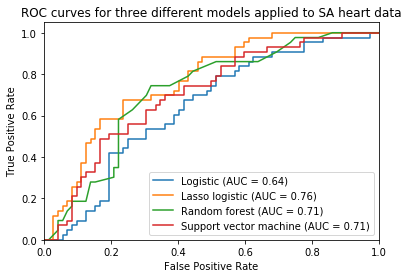

In [37]:
plt.figure()
plt.plot(roc_lr[0],roc_lr[1],label='Logistic (AUC = {0:0.2f})'.format(lr_auc))
plt.plot(roc_lassolr[0],roc_lassolr[1],label='Lasso logistic (AUC = {0:0.2f})'.format(lassolr_auc))
plt.plot(roc_rf[0],roc_rf[1],label='Random forest (AUC = {0:0.2f})'.format(rf_auc))
plt.plot(roc_svm[0],roc_svm[1],label='Support vector machine (AUC = {0:0.2f})'.format(svm_auc))
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for three different models applied to SA heart data')